<a href="https://colab.research.google.com/github/leoooc/Vegetation-Dynamics-ViT/blob/main/Datafusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-06dee2f4a192>:32: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((B8 + B4) == 0, 0, (B8 - B4) / (B8 + B4))


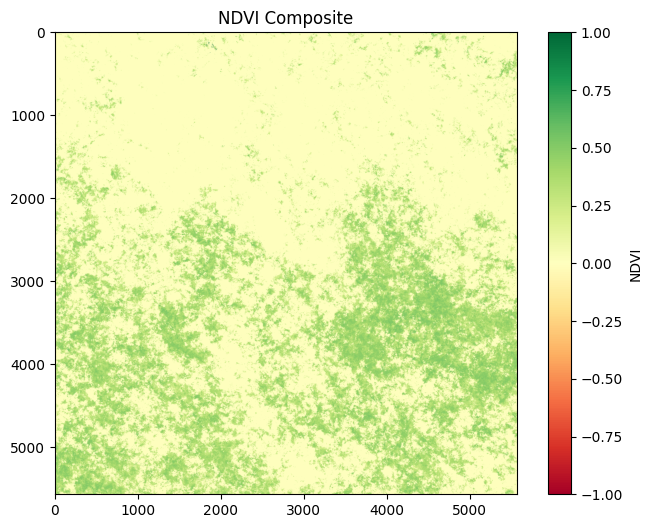

Merged composite saved to: /content/drive/MyDrive/EarthEngineExports/Merged_Composite.tif


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths (update these paths if needed)
s2_path = '/content/drive/MyDrive/EarthEngineExports/Sentinel2_Composite_TIFF.tif'
s1_path = '/content/drive/MyDrive/EarthEngineExports/Sentinel1_Composite_TIFF.tif'

# Step 3: Read the Sentinel-2 composite (optical bands)
with rasterio.open(s2_path) as src:
    s2_data = src.read()  # Expected shape: (bands, height, width)
    s2_meta = src.meta
    # Example: Assuming band order is [B2, B3, B4, B8]

# Step 4: Read the Sentinel-1 composite (VH band)
with rasterio.open(s1_path) as src:
    s1_data = src.read()  # Expected shape: (1, height, width)
    s1_meta = src.meta

# Step 5: Calculate NDVI from Sentinel-2 optical bands
# NDVI = (B8 - B4) / (B8 + B4)
# Adjust indices if your band ordering is different.
B4 = s2_data[2].astype('float32')  # Assuming band 3 is B4
B8 = s2_data[3].astype('float32')  # Assuming band 4 is B8

# Avoid division by zero
ndvi = np.where((B8 + B4) == 0, 0, (B8 - B4) / (B8 + B4))

# Step 6: Create a merged composite
# For example, stack the optical bands, computed NDVI, and the VH band.
# The merged array will have: [B2, B3, B4, B8, NDVI, VH]
merged = np.concatenate((s2_data,
                         np.expand_dims(ndvi, axis=0),  # NDVI as a new band
                         s1_data), axis=0)

# Step 7: Visualize the NDVI layer for sanity check
plt.figure(figsize=(8,6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI Composite')
plt.show()

# Step 8: (Optional) Save the merged composite to Google Drive
# Update the metadata for the new composite: total band count becomes optical bands + NDVI + VH
merged_meta = s2_meta.copy()
merged_meta.update({'count': merged.shape[0]})

output_path = '/content/drive/MyDrive/EarthEngineExports/Merged_Composite.tif'
with rasterio.open(output_path, 'w', **merged_meta) as dst:
    dst.write(merged)

print("Merged composite saved to:", output_path)

